# UTE - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@description**: Detalles del procedimiento para solicitar los datos RAW de los pluviómetros. Detalles del proceso para anexar informacion de lat/lon al dataset.
 - **Data Source**:  https://apps.ute.com.uy/SgePublico/BajadasGE.aspx
 - **Output**: 
  -  .

 - **Input**: 
   - Descarga 25-07-2022 13_14.txt (TXT con datos raw de las estaciones) 
 - **@version**: v1.3
 - **@date**: 2022-08-10,  2022-08-06, 2022-08-01, 2022-07-30, 2022-07-25   


## Request Data



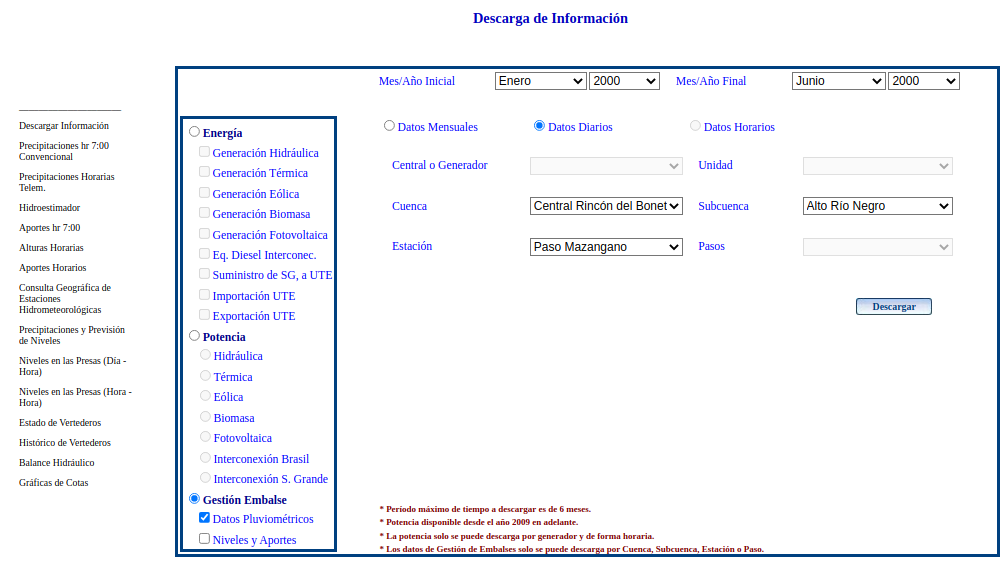

- Url: https://apps.ute.com.uy/SgePublico/BajadasGE.aspx
- Filtres:
  - **Gestión Embalse**: click
  - **Datos Pluviométricos**: click
  - **Mes/Año Inicial**: 2000-01-01 
  - **Mes/Año Final**: 2020-12-31  
  - **Datos Diarios**: click
  - **Cuenca**: seleccionar
  - **Subcuenca**: seleccionar
  - **Estación**: seleccionar
  - **Pasos**: seleccionar 
  - Click **Descargar**

Note:
-  Período máximo de tiempo a descargar es de 6 meses.
-  Potencia disponible desde el año 2009 en adelante.
-  La potencia solo se puede descarga por generador y de forma horaria.
-  Los datos de Gestión de Embalses solo se puede descarga por Cuenca, Subcuenca, Estación o Paso.  

## Libraries

In [ ]:
!apt install file

In [ ]:
# https://pypi.org/project/wget/
!pip install wget

In [ ]:
!pip install geopandas 

In [ ]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [ ]:
def get_lat_lon(df,lat='lat',lon='lon'):
  df_ = df.reset_index()[[lat,lon]]
  df_ = df_.drop_duplicates()
  return pd.DataFrame(df_, columns=['lat','lon'])

## Download Data

Check in your email and copy the download link

In [ ]:
# Download data
shutil.rmtree('./data', ignore_errors=True)
os.mkdir('./data')

filename="/content/Descarga 25-07-2022 13_14.txt"

In [ ]:
filename

'/content/Descarga 25-07-2022 13_14.txt'

Read metadata
- **Fecha**: Date   
- **Code**:  
- **Cuenca**:  Cuenca's name
- **Subcuenca**:  Subuenca's name
- **Paso**:  Paso's name
- **Estación**:  Estación's name
- **Precipitación**:  mm 
- **Observaciónes**:  


## Show Data

In [ ]:
!gdown -O "/content/Descarga 25-07-2022 13_14.txt" "1GS34sJRqgOfxwxi0c5i-Ao60SuZgAKfl"

Downloading...
From: https://drive.google.com/uc?id=1GS34sJRqgOfxwxi0c5i-Ao60SuZgAKfl
To: /content/Descarga 25-07-2022 13_14.txt
100% 16.3k/16.3k [00:00<00:00, 21.5MB/s]


In [ ]:
!file -i "$filename"

/content/Descarga 25-07-2022 13_14.txt: text/plain; charset=iso-8859-1


In [ ]:
!iconv -f ISO-8859-1 "$filename" -t UTF-8  -o ute_dataset.txt 
!head ute_dataset.txt

Descargas realizadas el 25/07/2022 13:14 de Gestión Embase
__________________________________________________________
01/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
02/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
03/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
04/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
05/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
06/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
07/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 
08/01/2000; 700; Central Rincón del Bonete; Alto Río Negro; Aguiar; Paso Mazangano; 0; 


In [ ]:
encoding='utf8'
names=['date','code','cuenca','subcuenca','paso','estacion','precipitacion','obs']
df_gauge = pd.read_csv('ute_dataset.txt',index_col=False, skiprows=2,names=names, sep=';', encoding = encoding)
df_gauge

,date,code,cuenca,subcuenca,paso,estacion,precipitacion,obs
0,01/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
1,02/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
2,03/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
3,04/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
4,05/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
...,...,...,...,...,...,...,...,...
177,26/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
178,27/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,
179,28/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,22,
180,29/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,30,


## Add Georeferenced

- **Url**: https://apps.ute.com.uy/SgePublico/MapaEstacionesHid.aspx

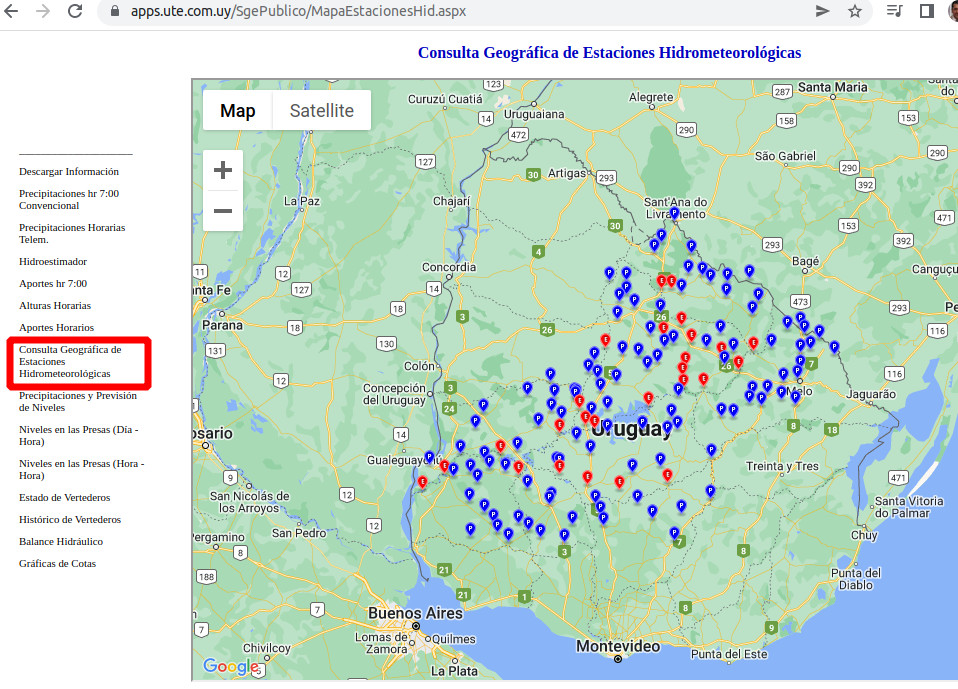

There is a complexity related to the georeferencing of stations. In the dataset, latitude and longitude are missing. So we need to add using an external source. In our case, we can use the mark provided by UTE.

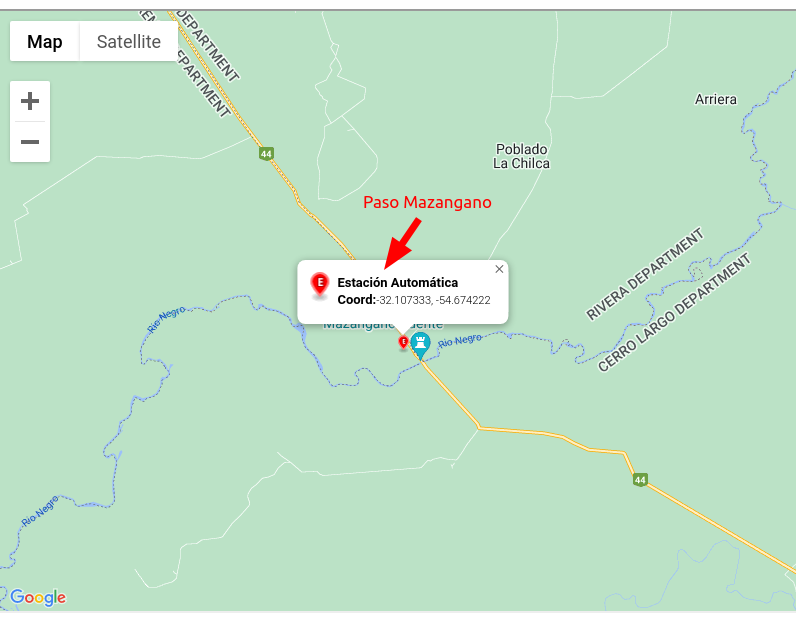

In [ ]:
df_gauge['lat']=-32.107333
df_gauge['lon']=-54.674222
df_gauge

,date,code,cuenca,subcuenca,paso,estacion,precipitacion,obs,lat,lon
0,01/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
1,02/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
2,03/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
3,04/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
4,05/01/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
...,...,...,...,...,...,...,...,...,...,...
177,26/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
178,27/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,0,,-32.107333,-54.674222
179,28/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,22,,-32.107333,-54.674222
180,29/06/2000,700,Central Rincón del Bonete,Alto Río Negro,Aguiar,Paso Mazangano,30,,-32.107333,-54.674222


## Visualize ShapeFile

In [ ]:
!gdown -O ./data/Uruguay_shapefile.zip "1ETYRUSliY736y5LmzdMCNZS06A3-FOQT"
!unzip -o -d ./data  ./data/Uruguay_shapefile.zip 


Downloading...
From: https://drive.google.com/uc?id=1ETYRUSliY736y5LmzdMCNZS06A3-FOQT
To: /content/data/Uruguay_shapefile.zip
100% 8.59k/8.59k [00:00<00:00, 11.2MB/s]
Archive:  ./data/Uruguay_shapefile.zip
  inflating: ./data/Uruguay.shp      
  inflating: ./data/Uruguay.dbf      
  inflating: ./data/Uruguay.shx      




File: ./data/Uruguay.shp 




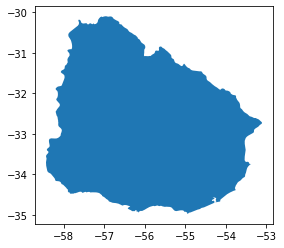

In [ ]:

# file_shape = "/content/Uruguay.shp"
path = r'./data/*.shp'
files = glob.glob(path)
file_shape=files[0]
print('\n\nFile:', file_shape,'\n\n')


crs={'init':'epsg:4326'}
geodf_shape = gpd.read_file(file_shape, crs=crs)
geodf_shape.plot()


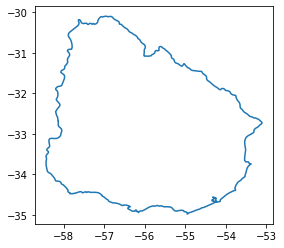

In [ ]:
# plot boundaries
geodf_shape.boundary.plot()

## Plot

In [ ]:
df_sat_lat_lon = get_lat_lon(df_gauge,'lat','lon')
df_sat_lat_lon[:5]

,lat,lon
0,-32.107333,-54.674222


In [ ]:
df_sat_lat_lon.describe()

,lat,lon
count,1.000000,1.000000
mean,-32.107333,-54.674222
std,NaN,NaN
min,-32.107333,-54.674222
25%,-32.107333,-54.674222
50%,-32.107333,-54.674222
75%,-32.107333,-54.674222
max,-32.107333,-54.674222


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


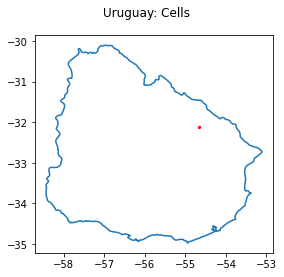

In [ ]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_sat_lat_lon['lon'], df_sat_lat_lon['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_sat_lat_lon,crs=crs, geometry=geometry)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay: Cells ', fontsize=12)
fig.show()

- **Spatial Resolution**: 1°x1°        (157.40 km diagonal distance [111.30kmx111.30km] )
- **Spatial Resolution**: 0.25°x0.25°  (39.35 km diagonal distance [27.83kmx27.83km] ) 
- **Spatial Resolution**: 0.1°x0.1°        (15.74 km diagonal distance [11.13kmx11.13km] )
- **Spatial Resolution**: 0.05°x0.05°  (7.87 km diagonal distance  [5.57kmx5.57km] )



## UTE Gauges Stations

In [ ]:
# https://apps.ute.com.uy/SgePublico/MapaEstacionesHid.aspx
filename_estaciones_data = "./data/master_geodata_raw_ute.csv"
!gdown -O $filename_estaciones_data "1j7URTkXS7puosntwHQmbOotjVfj4QOdb"

df_estaciones = pd.read_csv(filename_estaciones_data)
df_estaciones = df_estaciones[  df_estaciones['type'].str.find('modificado') < 0]
df_estaciones[:3]                            


Downloading...
From: https://drive.google.com/uc?id=1j7URTkXS7puosntwHQmbOotjVfj4QOdb
To: /content/data/master_geodata_raw_ute.csv
100% 10.9k/10.9k [00:00<00:00, 15.8MB/s]


,id,name,lat,lon,type
0,1496,Aceguá,-31.874111,-54.161000,PluvConv
1,1734,Achar,-32.404028,-56.180722,PluvConv
2,1521,Aldea San Joaquín,-31.959417,-55.810861,PluvConv


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


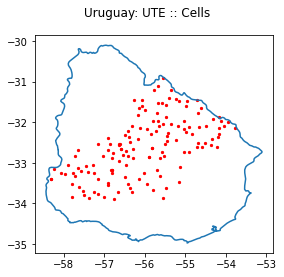

In [ ]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry_estaciones=[Point(xy) for xy in zip(df_estaciones['lon'], df_estaciones['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_estaciones,crs=crs, geometry=geometry_estaciones)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay: UTE :: Cells ', fontsize=12)
fig.show()